In [55]:
import pandas as pd
import numpy as np
df= pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

In [56]:
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [57]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


<Axes: ylabel='Frequency'>

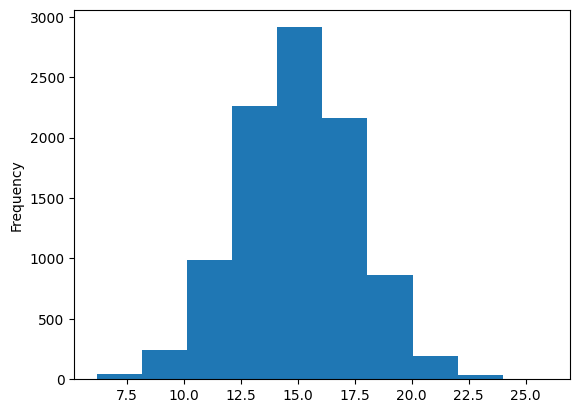

In [58]:
df['fuel_efficiency_mpg'].plot.hist()

In [59]:
df['fuel_efficiency_mpg'].kurt()

0.022732244497634557

In [60]:
df['fuel_efficiency_mpg'].skew()

-0.012062219273507929

# Question 1
# Finding the name of column with null lvalue

In [61]:
df[['engine_displacement','horsepower','vehicle_weight','model_year']].isnull().sum()


engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
dtype: int64

# Question 2
# Finding the median (50% percentile) for variable 'horsepower'

In [62]:
df['horsepower'].median()

149.0

In [63]:
len(df)

9704

# Split the data set

In [64]:
def random_shuffle(df,seed_value):
    np.random.seed(seed_value)
    n= len(df)
    idx= np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx].reset_index(drop=True)
    return df_shuffled
random_shuffle(df,42)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
9699,210,163.0,1972.029124,2011,19.961672
9700,160,126.0,3011.588014,2009,14.651056
9701,290,187.0,2440.508039,2019,18.404435
9702,260,129.0,1865.404480,2019,20.502460


In [65]:
def split_dataset(df,val_ratio=0.2, test_ratio=0.2, seed_value=42):
    df_shuffled=random_shuffle(df,seed_value)
    n=len(df)
    
    n_val=int(val_ratio*n)
    n_test=int(test_ratio*n)
    n_train=n-(n_val+n_test)

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    return df_train, df_val, df_test
split_dataset(df)





(      engine_displacement  horsepower  vehicle_weight  model_year  \
 0                     220       144.0     2535.887591        2009   
 1                     160       141.0     2741.170484        2019   
 2                     230       155.0     2471.880237        2017   
 3                     150       206.0     3748.164469        2015   
 4                     300       111.0     2135.716359        2006   
 ...                   ...         ...             ...         ...   
 5819                  260       139.0     2606.972984        2009   
 5820                  280       132.0     4004.214323        2014   
 5821                  210       152.0     2500.175687        2020   
 5822                  250       154.0     2254.313245        2002   
 5823                  210       152.0     2435.203606        2004   
 
       fuel_efficiency_mpg  
 0               16.642943  
 1               16.298377  
 2               18.591822  
 3               11.818843  
 4           

# Question 3

In [66]:
def X_y_train_val_test(df,target_column, val_ratio=0.2, test_ratio=0.2, seed_value=42):
    df_train, df_val, df_test = split_dataset(df,val_ratio, test_ratio, seed_value)

    y_train_orig = df_train[target_column].values
    y_val_orig = df_val[target_column].values
    y_test_orig = df_test[target_column].values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)

    X_train=df_train.drop(columns=[target_column])
    X_val=df_val.drop(columns=[target_column])
    X_test=df_test.drop(columns=[target_column])
    
    return X_train, X_val, X_test, y_train, y_val, y_test

x= X_y_train_val_test(df,'fuel_efficiency_mpg')

x







(      engine_displacement  horsepower  vehicle_weight  model_year
 0                     220       144.0     2535.887591        2009
 1                     160       141.0     2741.170484        2019
 2                     230       155.0     2471.880237        2017
 3                     150       206.0     3748.164469        2015
 4                     300       111.0     2135.716359        2006
 ...                   ...         ...             ...         ...
 5819                  260       139.0     2606.972984        2009
 5820                  280       132.0     4004.214323        2014
 5821                  210       152.0     2500.175687        2020
 5822                  250       154.0     2254.313245        2002
 5823                  210       152.0     2435.203606        2004
 
 [5824 rows x 4 columns],
       engine_displacement  horsepower  vehicle_weight  model_year
 5824                  180       112.0     2772.134410        2020
 5825                  260       1

In [67]:
df.isnull().sum()


engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [68]:
mean=df['horsepower'].mean()
mean


149.65729212983547

In [69]:
def prepare_x(df, fill_value):
    df_num = df.fillna(fill_value)
    x=np.array(df_num)
    return x





In [70]:
def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones, X])
    
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w=XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]


# RMSE with zero value

In [71]:
X_train, X_val, X_test, y_train, y_val, y_test = X_y_train_val_test(df,'fuel_efficiency_mpg')
fill_zero=prepare_x(X_train,0)
w_0, w = train_linear_regression(fill_zero, y_train)
print(w_0, w)

y_predict= w_0 + X_val.dot(w)


3.664666247254423 [ 2.14827083e-06  2.21209296e-04 -3.23460699e-04  1.64673231e-05]


In [72]:
X_train, X_val, X_test, y_train, y_val, y_test = X_y_train_val_test(df,'fuel_efficiency_mpg')

def val_rmse(y, y_predict):
    error = y_predict - y
    mse= (error**2).mean()
    rmse= np.sqrt(mse)
    return rmse

rmse_zero=val_rmse(y_val, y_predict)
print(f"RMSE with zero:{rmse_zero:.2f}")

RMSE with zero:0.04


# RMSE with mean value

In [73]:
horsepower_mean=X_train['horsepower'].mean()
horsepower_mean

149.54476367006487

In [74]:
X_train, X_val, X_test, y_train, y_val, y_test = X_y_train_val_test(df,'fuel_efficiency_mpg')
fill_mean=prepare_x(X_train,horsepower_mean)
w_0, w = train_linear_regression(fill_mean, y_train)
print(w_0, w)
y_predict= w_0 + X_val.dot(w)
rmse_mean=val_rmse(y_val, y_predict)
print(f"RMSE with mean:{rmse_mean:.2f}")

3.671000819625295 [ 3.63140955e-06  6.65758686e-04 -3.23242585e-04 -2.14173526e-05]
RMSE with mean:0.04


# Question 4

In [75]:
def train_linear_reg_leg(X,y, r=0.0):
    ones= np.ones(X.shape[0])
    X=np.column_stack([ones, X])
    
    XTX=X.T.dot(X)
    r_i=r*np.eye(XTX.shape[0])
    r_i[0, 0] = 0
   
    XTX_inv=np.linalg.inv(XTX+r_i)
    w=XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]





In [76]:
fill_zero=prepare_x(X_train,0)
list_r = [0, 0.01, 0.1, 1, 5, 10, 100]

rmse_value=[]

for i in list_r:
    w_0, w= train_linear_reg_leg(fill_zero, y_train, r=i)
    y_predict = w_0 + fill_zero.dot(w)
    rmse=val_rmse(y_train, y_predict)
    rmse_value.append(rmse)
    
for i in (rmse_value):
    print(f"RMSE:{i:.2f}")

    


RMSE:0.04
RMSE:0.04
RMSE:0.04
RMSE:0.04
RMSE:0.04
RMSE:0.04
RMSE:0.04


# Question 5

In [77]:
seed_values= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_score=[]
for i in seed_values:
    X_train, X_val, X_test, y_train, y_val, y_test = X_y_train_val_test(df,target_column='fuel_efficiency_mpg', val_ratio=0.2, test_ratio=0.2, seed_value=i)
    fill_zero=prepare_x(X_train,0)
    w_0, w = train_linear_regression(fill_zero, y_train)
    y_predict= w_0 + X_val.dot(w)
    rmse_zero=val_rmse(y_val, y_predict)
    rmse_score.append(rmse_zero)

for i in seed_values:
    print(f"Seed value:{seed_values[i]}, RMSE Score:{rmse_score[i]}")
    
    
    
    

Seed value:0, RMSE Score:0.03682659903042285
Seed value:1, RMSE Score:0.038316156629110816
Seed value:2, RMSE Score:0.03822343784935675
Seed value:3, RMSE Score:0.03740114862449291
Seed value:4, RMSE Score:0.036093316454223014
Seed value:5, RMSE Score:0.03766730216620211
Seed value:6, RMSE Score:0.0377247500761145
Seed value:7, RMSE Score:0.037501554895897606
Seed value:8, RMSE Score:0.0387607259079047
Seed value:9, RMSE Score:0.03765241879204821


In [78]:
rmse_std=np.std(rmse_score)
print(f"RMSE with Standard DEviation:{round(rmse_std,3)}")

RMSE with Standard DEviation:0.001


# Question 6

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = X_y_train_val_test(df,target_column='fuel_efficiency_mpg', val_ratio=0.2, test_ratio=0.2, seed_value=9)
X_combined= pd.concat([X_train, X_val], axis=0, ignore_index=True)
y_combined= np.concatenate([y_train, y_val], axis=0)
print(X_combined.shape, y_combined.shape)

fill_zero=prepare_x(X_combined, 0)
w_0, w= train_linear_reg_leg(fill_zero, y_combined, r=0.001)
print(w_0, w)
y_predict= w_0 + X_test.dot(w)
y_predict_exp = np.exp(y_predict)
y_test_exp = np.exp(y_test)
rmse_zero=val_rmse(y_test_exp, y_predict_exp)
print(f"Final RMSE value:{rmse_zero}")





(7764, 4) (7764,)
3.5720429066316246 [-4.64399507e-06  2.26071683e-04 -3.22546200e-04  6.15650213e-05]
RMSE value:0.5925110314469615
